# 심장 질환 예측 경진대회 EDA

안녕하세요! 심장 진환 예측 경진대회로 돌아온 데이콘 베이직입니다!

이번 대회는 주어진 feature들을 통해 심장 질환 여부(target)을 예측하는 대회입니다.

target은 질환이 없음=0, 질환이 있음=1 의 2개 클래스로 이루어져 있습니다.

EDA에 앞서 데이터의 구성과 결측치를 확인하겠습니다.

## 데이터 불러오기

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib import patches
%matplotlib inline

train = pd.read_csv('../dacon_heart/dataset/train.csv')
train

,id,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,1,53,1,2,130,197,1,0,152,0,1.2,0,0,2,1
1,2,52,1,3,152,298,1,1,178,0,1.2,1,0,3,1
2,3,54,1,1,192,283,0,0,195,0,0.0,2,1,3,0
3,4,45,0,0,138,236,0,0,152,1,0.2,1,0,2,1
4,5,35,1,1,122,192,0,1,174,0,0.0,2,0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
146,147,50,1,2,140,233,0,1,163,0,0.6,1,1,3,0
147,148,51,1,2,94,227,0,1,154,1,0.0,2,1,3,1
148,149,69,1,3,160,234,1,0,131,0,0.1,1,1,2,1
149,150,46,1,0,120,249,0,0,144,0,0.8,2,0,3,0


In [2]:
# 결측치 확인
def check_missing_col(dataframe):
    counted_missing_col = 0
    for i, col in enumerate(dataframe.columns):
        missing_values = sum(dataframe[col].isna())
        is_missing = True if missing_values >= 1 else False
        if is_missing:
            counted_missing_col += 1
            print(f'결측치가 있는 컬럼은: {col}입니다')
            print(f'총 {missing_values}개의 결측치가 존재합니다.')

        if i == len(dataframe.columns) - 1 and counted_missing_col == 0:
            print('결측치가 존재하지 않습니다')

check_missing_col(train)

결측치가 존재하지 않습니다


이번 데이콘 베이직 역시 결측치가 존재하지 않습니다.

조금 더 수월하게 EDA를 진행할 수 있을것 같습니다!

## 기초 통계 분석 & 히스토그램 

정형 데이터는 먼저 기초 통계량을 파악하면 데이터를 쉽게 이해할 수 있습니다.

In [3]:
# pandas 의 메서드를 이용하면 간단하게 기초 통계량을 확인할 수 있습니다.
train.describe()

,id,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,151.000000,151.000000,151.000000,151.000000,151.000000,151.000000,151.000000,151.000000,151.000000,151.000000,151.000000,151.000000,151.000000,151.000000,151.000000
mean,76.000000,54.496689,0.682119,1.066225,132.033113,244.529801,0.158940,0.509934,150.629139,0.324503,0.976821,1.377483,0.602649,2.317881,0.549669
std,43.734045,8.904586,0.467202,1.056213,17.909929,56.332206,0.366837,0.514685,23.466463,0.469747,1.085998,0.640226,0.917093,0.604107,0.499183
min,1.000000,34.000000,0.000000,0.000000,94.000000,131.000000,0.000000,0.000000,88.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,38.500000,48.500000,0.000000,0.000000,120.000000,208.000000,0.000000,0.000000,136.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,76.000000,54.000000,1.000000,1.000000,130.000000,239.000000,0.000000,1.000000,155.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,113.500000,61.000000,1.000000,2.000000,140.000000,270.000000,0.000000,1.000000,168.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,151.000000,77.000000,1.000000,3.000000,192.000000,564.000000,1.000000,2.000000,195.000000,1.000000,5.600000,2.000000,3.000000,3.000000,1.000000


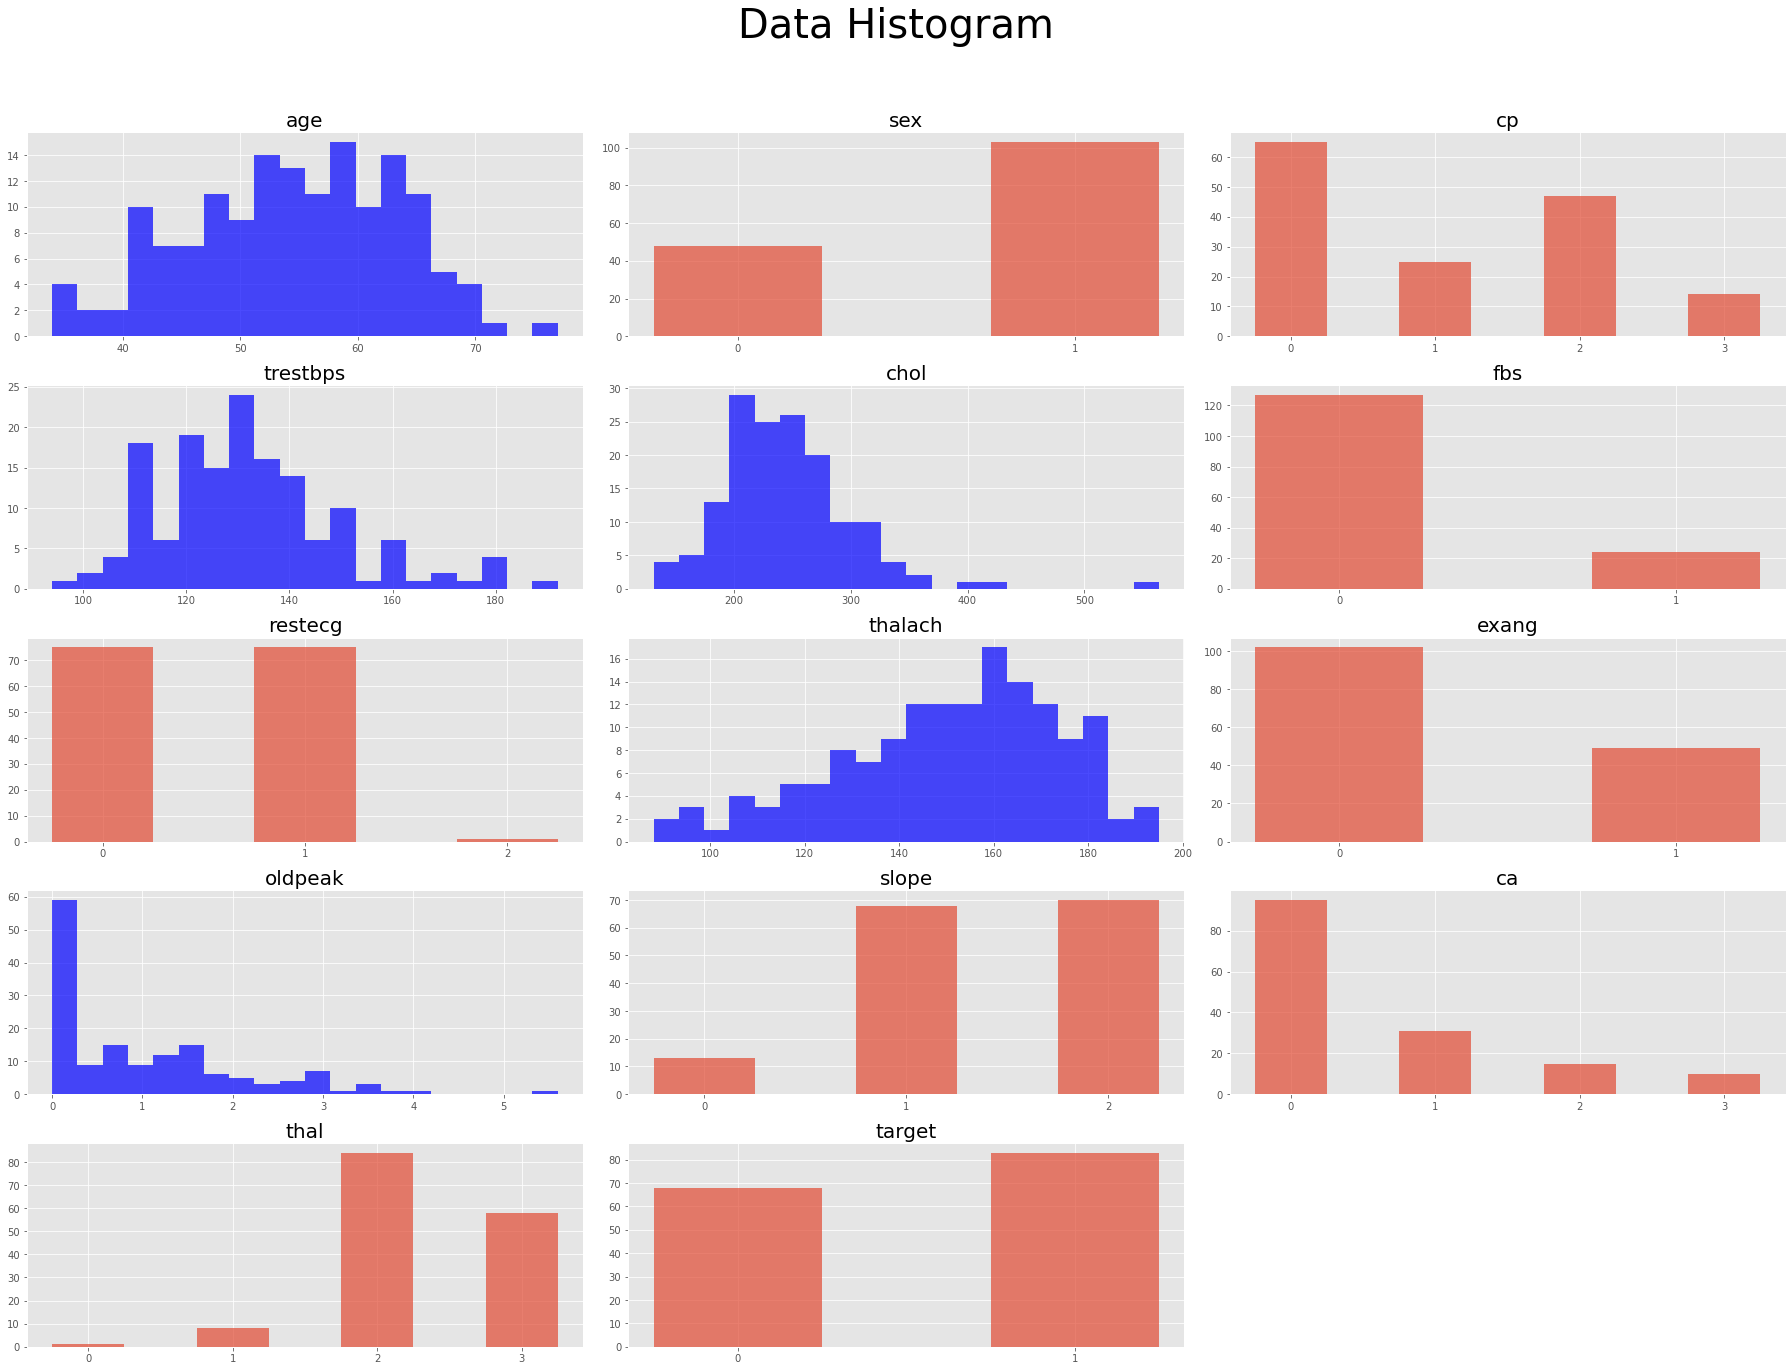

In [4]:
plt.style.use("ggplot")

# 히스토그램 을 사용해서 데이터의 분포를 살펴봅니다.
plt.figure(figsize=(25,20))
plt.suptitle("Data Histogram", fontsize=40)

# id는 제외하고 시각화합니다.
cols = train.columns[1:]
for i in range(len(cols)):
    plt.subplot(5,3,i+1)
    plt.title(cols[i], fontsize=20)
    if len(train[cols[i]].unique()) > 20:
        plt.hist(train[cols[i]], bins=20, color='b', alpha=0.7)
    else:
        temp = train[cols[i]].value_counts()
        plt.bar(temp.keys(), temp.values, width=0.5, alpha=0.7)
        plt.xticks(temp.keys())
plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()

- 나이(age)는 정규 분포 형태를 이루는 것으로 보입니다.
- 성별(sex)은 남자(1)가 약 2배 정도 되네요.
- oldpeak이 왼쪽으로 치우쳐져 있다는 것이 눈에 띄네요.
- 또한 restecg와 thal의 경우 매우 적은 수의 극단값 클래스가 있다는 것도 알 수 있습니다.
- target은 약간 차이가 있지만 이정도면 심각한 imbalance는 아닌 듯 보입니다.

이번엔 바이올린 차트를 통해 target에 따른 분포를 살펴봅시다.

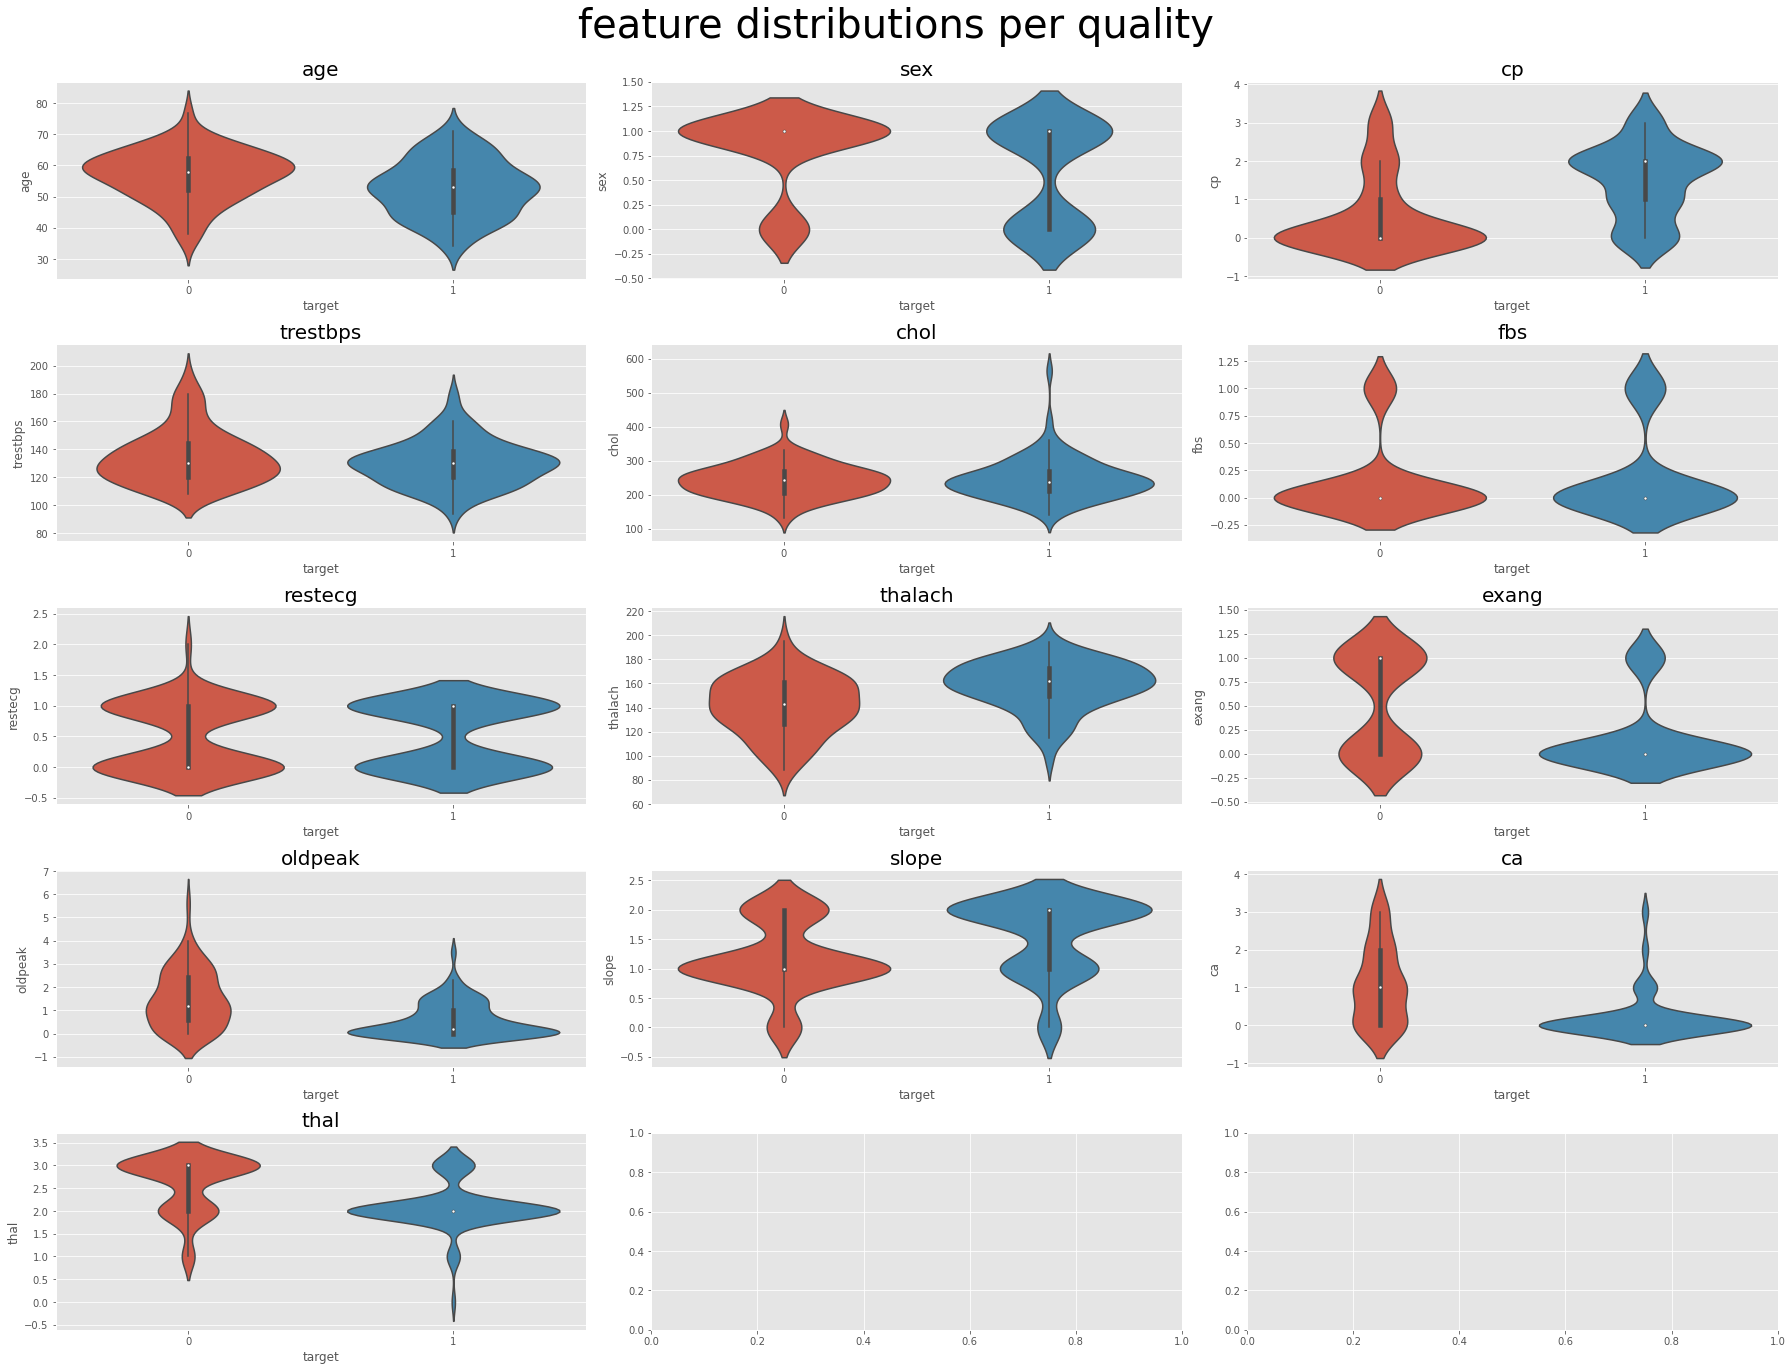

In [5]:
fig, axes = plt.subplots(5, 3, figsize=(25, 20))

fig.suptitle('feature distributions per quality', fontsize= 40)
for ax, col in zip(axes.flat, train.columns[1:-1]):
    sns.violinplot(x= 'target', y= col, ax=ax, data=train)
    ax.set_title(col, fontsize=20)
plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()


특정 feature에서는 target에 따라 다른 분포를 보여주네요. (cp, exang, oldpeak, slope, ca, thal)

이러한 특징을 잘 활용하면 분석에 많은 도움이 될 것 같습니다!

## 상관관계 확인하기

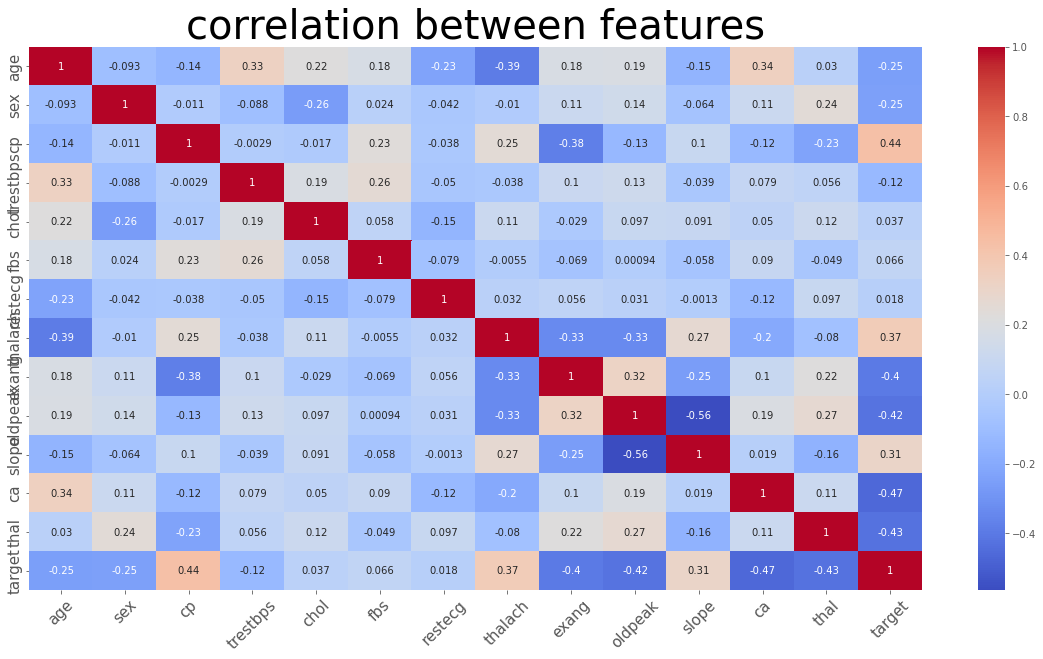

In [6]:
plt.figure(figsize=(20,10))

heat_table = train.drop(['id'], axis=1).corr()
heatmap_ax = sns.heatmap(heat_table, annot=True, cmap='coolwarm')
heatmap_ax.set_xticklabels(heatmap_ax.get_xticklabels(), fontsize=15, rotation=45)
heatmap_ax.set_yticklabels(heatmap_ax.get_yticklabels(), fontsize=15)
plt.title('correlation between features', fontsize=40)
plt.show()

상관관계 표를 보니 target과 가장 강한 상관관계를 가진 feature는 ca로, 0.47 정도의 상관관계를 보입니다.

척보기엔 특별히 critical 한 feature가 있는 것 같지는 않습니다.

## PCA 시각화

상관관계가 큰 변수들이 없으니 PCA를 통한 차원 축소 및 시각화를 해봅시다.

PCA란, Principal Component Analysis의 약자로 데이터를 n개의 주성분으로 축소하여 분석하는 방법입니다.

다양한 feature들이 있는 데이터를 x축과 y축만 있는 2D 평면에 표현할 수 있게 해주는 EDA 방법 중 하나이기도 합니다.

In [7]:
from sklearn.preprocessing import StandardScaler 

# 먼저 PCA를 위해 데이터를 표준화해줍니다.
data = train.drop(['id', 'target'], axis=1).values
target = train['target'].values

scaled_data = StandardScaler().fit_transform(data)

In [8]:
from sklearn.decomposition import PCA

# 2D 에 시각화하기 위해 주성분을 2개로 선택합니다.
pca = PCA(n_components=2)
pca_data = pca.fit_transform(scaled_data)
principalDf = pd.DataFrame(data=pca_data, columns = ['principal component 1', 'principal component 2'])
principalDf['target'] = target

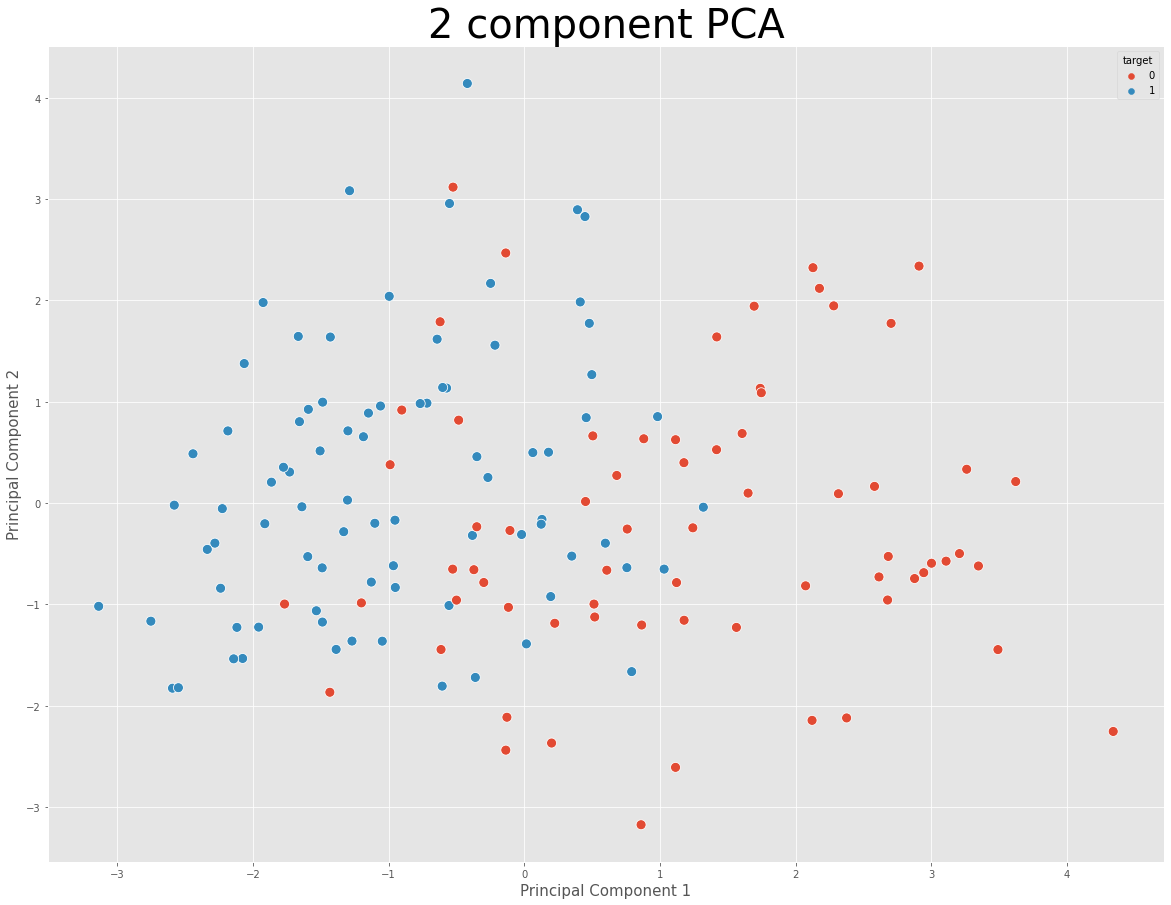

In [9]:
plt.figure(figsize = (20, 15))

plt.xlabel('Principal Component 1', fontsize = 15)
plt.ylabel('Principal Component 2', fontsize = 15)
plt.title('2 component PCA', fontsize = 40)

sns.scatterplot(x='principal component 1', y='principal component 2', data=principalDf, hue='target', s= 100)
plt.show()

정확하게 나뉘지는 않지만

target=0 값들은 대부분 오른쪽에 분포되어 있고,

target=1 값들은 대부분 왼쪽에 분포되어 있는 모습을 볼 수 있네요.

이제 이 노트북에서 데이터를 둘러보는 작업은 마무리하겠습니다.

여러분도 여러분만의 EDA를 진행하시고 코드공유에 올려주세요!

좋아요를 많이 받으시는 분께는 데이콘 후드가 제공됩니다!